### Klasyfikacja

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from my_functions import *
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [43]:
df_prep = pd.read_csv("..//datasets/gasometry_prepared_data.csv")

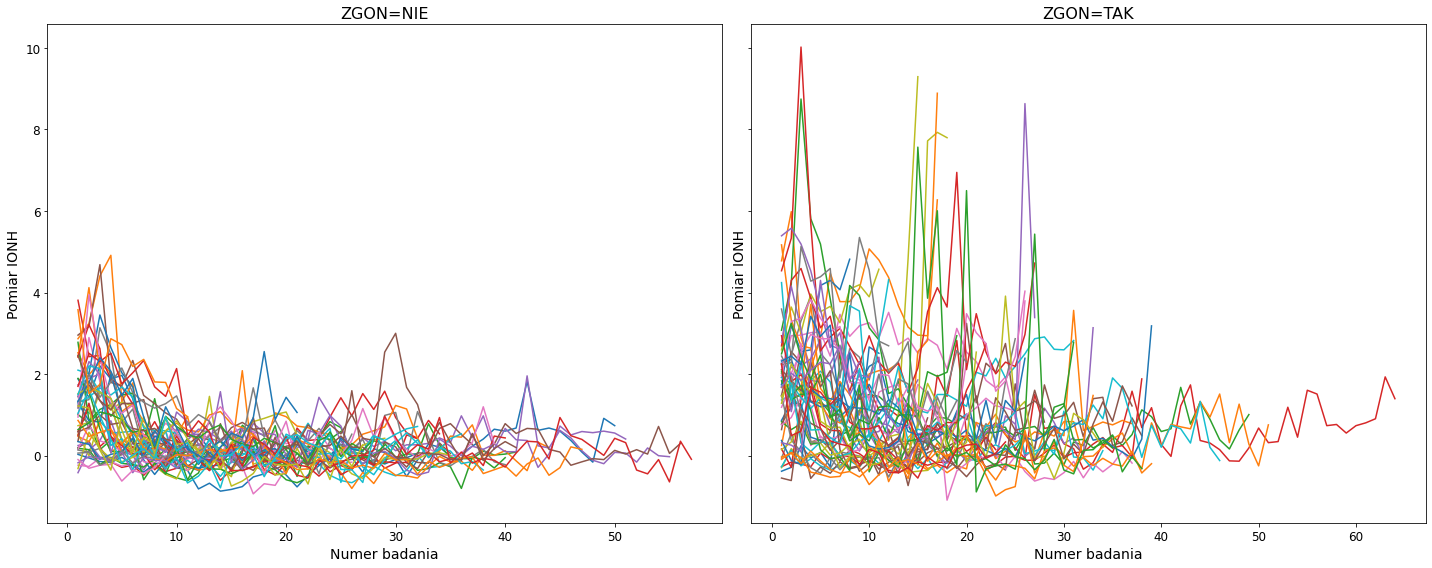

In [48]:
df_zgon_0 = df_prep[df_prep['ZGON'] == 0]
df_zgon_1 = df_prep[df_prep['ZGON'] == 1]

# Stwórz dwa wykresy
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Wykres dla ZGON=0
for pacjent_nr, group in df_zgon_0.groupby('PACJENT_NR'):
        axes[0].plot(group['BADANIE_NR'].values, group['IONH'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[0].set_title('ZGON=NIE', fontsize=16)
axes[0].set_xlabel('Numer badania', fontsize=14)
axes[0].set_ylabel('Pomiar IONH', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Wykres dla ZGON=1
for pacjent_nr, group in df_zgon_1.groupby('PACJENT_NR'):
        axes[1].plot(group['BADANIE_NR'].values, group['IONH'].values, label=f'Pacjent {int(pacjent_nr)}')

axes[1].set_title('ZGON=TAK', fontsize=16)
axes[1].set_xlabel('Numer badania', fontsize=24)
axes[2].set_ylabel('Pomiar IONH', fontsize=24)
axes[2].tick_params(axis='both', which='major', labelsize=22)

plt.tight_layout()
plt.savefig('..//images/porownanie_szeregi_IONH.png')
plt.show()

In [70]:
df_prep=df_prep[df_prep["BADANIE_NR"]<7]
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2"
my_red="#D62600"

df_prep2=df_prep.groupby("PACJENT_NR").mean().reset_index(drop=True)
df_prep2

,Unnamed: 0,BADANIE_NR,ZGON,BETET,CO2TET,HCO3ACTE,HCO3STTE,O2SATTET,O2TET,PHTET,IONH
0,2.5,3.5,0.0,0.634058,3.036667,1.116667,0.645833,0.286667,3.406667,-0.722222,1.793336
1,52.5,3.5,0.0,0.811594,3.051667,1.419444,0.887500,-0.016667,0.735333,-0.776667,1.867312
2,62.5,3.5,0.0,2.054348,1.906667,2.002778,2.158333,0.770000,2.386000,0.521667,0.473546
3,103.5,3.5,0.0,2.057971,1.475000,1.922222,2.254167,0.746667,2.924000,0.838333,0.218036
4,137.5,3.5,0.0,0.605072,0.276667,0.597222,0.962500,-1.690000,-0.314000,0.866667,0.178608
...,...,...,...,...,...,...,...,...,...,...,...
102,2839.5,3.5,0.0,1.663043,1.545000,1.561111,1.820833,0.620000,2.160667,0.375000,0.644338
103,2871.5,3.5,1.0,1.057971,1.566667,1.188889,1.175000,-0.670000,0.659333,0.013333,1.003248
104,2895.5,3.5,0.0,1.014493,2.805000,1.366667,1.070833,0.233333,1.214667,-0.756667,1.828928
105,2916.5,3.5,0.0,1.579710,4.440000,1.988889,1.570833,0.233333,1.604667,-1.206667,2.438408


In [73]:
train_data, test_data = train_test_split(df_prep2, test_size=0.2, stratify=df_prep2["ZGON"], random_state=42)
train_data = train_data.drop(train_data.columns[0], axis=1)

In [74]:
X_train=train_data[cols]
y_train=train_data["ZGON"]

X_test=test_data[cols]
y_test=test_data["ZGON"]

#### Dummy classifier

In [120]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)


In [121]:
tab1=pd.DataFrame(columns=["Zmienna", "Wartość"])
param_y_test=y_test
param_y_pred=y_pred
accuracy = accuracy_score(param_y_test, param_y_pred)
balanced_accuracy = balanced_accuracy_score(param_y_test, param_y_pred)
precision = precision_score(param_y_test, param_y_pred, average="weighted", zero_division=0)
recall = recall_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)
f1 = f1_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)

# Dodawanie wyników do ramki danych
tab1 = pd.concat([tab1, pd.DataFrame([["Accuracy", accuracy]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab1 = pd.concat([tab1, pd.DataFrame([["Precision", precision]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab1 = pd.concat([tab1, pd.DataFrame([["Sensivity (recall)", recall]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab1 = pd.concat([tab1, pd.DataFrame([["F1-Score", f1]], columns=["Zmienna", "Wartość"])], ignore_index=True)

print(tab1)

              Zmienna   Wartość
0            Accuracy  0.500000
1           Precision  0.250000
2  Sensivity (recall)  0.500000
3            F1-Score  0.333333


C:\Users\dorot\AppData\Local\Temp\ipykernel_60028\1854638017.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



### Drzewo decyzyjne

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

ma_train = []
ma_test = []
depth = np.arange(1, 15)
for j in depth:
    model = DecisionTreeClassifier(random_state=42, max_depth=j)
    a_test = []
    a_tren = []

    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        a_test.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]).round(4))
        a_tren.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]).round(4))

    ma_test.append(np.mean(a_test))
    ma_train.append(np.mean(a_tren))

In [77]:
train_test_plot(depth, ma_train, ma_test, "Max Depth", "max_depth_tree6")

In [78]:
op_depth_tree=np.argmax(ma_test)+1
op_depth_tree

1

In [79]:
model_dt= DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)

trees_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,20)
}
 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
dt_grid_search = GridSearchCV(model_dt, trees_param_grid, cv=cv_strategy, scoring='balanced_accuracy', return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20)},
             return_train_score=True, scoring='balanced_accuracy')

In [80]:
tree_results=dt_grid_search.cv_results_
results_df = pd.DataFrame(tree_results)
params_df = pd.json_normalize(results_df['params'])
metrics = ['mean_test_score', 'std_test_score']
tree_results_df = pd.concat([params_df, results_df[metrics]], axis=1)

tree_results_df.columns=["criterion", "max_depth", "min_samples_leaf", "mean_test_score", "std_test_score"]
tree_results_df.sort_values(by='mean_test_score', ascending=False).head(10)

,criterion,max_depth,min_samples_leaf,mean_test_score,std_test_score
61,gini,4,5,0.684722,0.127339
327,entropy,9,5,0.683333,0.076275
270,entropy,6,5,0.683333,0.076275
308,entropy,8,5,0.683333,0.076275
289,entropy,7,5,0.683333,0.076275
251,entropy,5,5,0.680556,0.138889
291,entropy,7,7,0.675000,0.122695
329,entropy,9,7,0.675000,0.122695
253,entropy,5,7,0.675000,0.122695
310,entropy,8,7,0.675000,0.122695


In [124]:
best_dt_model = dt_grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)
y_pred = best_dt_model.predict(X_test)
accuracy_assessment(y_test, y_pred)

Accuracy: 0.7272727272727273
Balanced accuracy: 0.7272727272727273
Precision: 0.761904761904762
Sensivity (recall): 0.7272727272727273
F1-Score: 0.7179487179487178


In [125]:
tab2=pd.DataFrame(columns=["Zmienna", "Wartość"])
param_y_test=y_test
param_y_pred=y_pred
accuracy = accuracy_score(param_y_test, param_y_pred)
balanced_accuracy = balanced_accuracy_score(param_y_test, param_y_pred)
precision = precision_score(param_y_test, param_y_pred, average="weighted", zero_division=0)
recall = recall_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)
f1 = f1_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)

# Dodawanie wyników do ramki danych
tab2 = pd.concat([tab2, pd.DataFrame([["Accuracy", accuracy]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab2 = pd.concat([tab2, pd.DataFrame([["Precision", precision]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab2 = pd.concat([tab2, pd.DataFrame([["Sensivity (recall)", recall]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab2 = pd.concat([tab2, pd.DataFrame([["F1-Score", f1]], columns=["Zmienna", "Wartość"])], ignore_index=True)

print(tab2)

              Zmienna   Wartość
0            Accuracy  0.727273
1           Precision  0.761905
2  Sensivity (recall)  0.727273
3            F1-Score  0.717949


C:\Users\dorot\AppData\Local\Temp\ipykernel_60028\4058052174.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [82]:
# significant_variables(model, X_train, "trees")
indeksy = np.where(model_dt.feature_importances_!=0)[0]
variables= [X_train.columns[i] for i in indeksy]
importances = model_dt.feature_importances_[indeksy]

# sortowanie
importances, variables= zip(*sorted(zip(importances, variables), reverse=True))
df_importances = pd.DataFrame({'Variable': variables, 'Importance': importances})
df_importances 

,Variable,Importance
0,HCO3ACTE,0.286794
1,O2TET,0.283177
2,HCO3STTE,0.157076
3,BETET,0.152134
4,O2SATTET,0.061361
5,CO2TET,0.059458


In [83]:
# kategorie=['minimum BETET \n measurement', 'minimum [H$^\plus$] \n (maximum pH)', 'maximum [H$^\plus$] (minimum pH)', 'maximum pCO$_2$', 'BETET below the norm [number of cases]',
#            '[H$^\plus$] below the norm \n (pH above the norm [number of cases])', 'pO$_2$ saturation below the norm \n [number of cases]', 'pCO$_2$ below the norm [number of cases]',
#            'BETET above the norm [number of cases]',
#            '[H$^\plus$] above the norm \n (pH below the norm) \n [number of cases]', 'average change in \n ion H concentration', 'average change in \n O$_2$ saturation', 'average change in pCO$_2$',
#            'BETET above the norm [number of cases in a row]', '[H$^\plus$] above the norm \n (pH below the norm) \n [number of cases in a row]', 'BETET below the norm [number of cases in a row]',
#            '[H$^\plus$] below the norm \n (pH above the norm) \n [number of cases in a row]', 'O$_2$ saturation above the norm \n [number of cases in a row]']

### Las losowy

In [84]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

ma_train = []
ma_test = []
depth = np.arange(1, 15)
for j in depth:
    model = RandomForestClassifier(random_state=42, max_depth=j)
    a_test = []
    a_tren = []

    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        a_test.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]).round(4))
        a_tren.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]).round(4))

    ma_test.append(np.mean(a_test))
    ma_train.append(np.mean(a_tren))

In [85]:
train_test_plot(depth, ma_train, ma_test, "Maksymalna głębokość drzew", "max_depth_forest6")

In [86]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
n_estimators_values = range(1,20)
ma_rf_train = []
ma_rf_test = []

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(random_state=10, n_estimators=n_estimators, max_depth=18)
    a_test = []
    a_tren = []
    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        a_test.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]).round(4))
        a_tren.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]).round(4))

    ma_rf_test.append(np.mean(a_test))
    ma_rf_train.append(np.mean(a_tren))

optimal_n_estimators = n_estimators_values[np.argmax(ma_rf_test)]
print("Optimal value n_estimators:", optimal_n_estimators)

Optimal value n_estimators: 11


In [87]:
train_test_plot(n_estimators_values, ma_rf_train, ma_rf_test, "Liczba drzew", "n_estimators_forest6")

In [140]:
model_rf=RandomForestClassifier(random_state=42)

rf_param_dist = {
    'n_estimators': range(10,50),
    'max_depth': range(1, 15),
    'min_samples_leaf': range(15)
}

model_rf.fit(X_train, y_train)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
rf_grid_search = GridSearchCV(model_rf, rf_param_dist , cv=cv_strategy, scoring='balanced_accuracy', return_train_score=True)
rf_grid_search.fit(X_train, y_train)

c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


2800 fits failed out of a total of 42000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\bas

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(0, 15),
                         'n_estimators': range(10, 50)},
             return_train_score=True, scoring='balanced_accuracy')

In [142]:
forest_results=rf_grid_search.cv_results_
results_df = pd.DataFrame(forest_results)
params_df = pd.json_normalize(results_df['params'])
metrics = ['mean_test_score', 'std_test_score']
forest_results_df = pd.concat([params_df, results_df[metrics]], axis=1)
forest_results_df.sort_values(by='mean_test_score', ascending=False).head(10)

,max_depth,min_samples_leaf,n_estimators,mean_test_score,std_test_score
5292,9,12,22,0.704167,0.133044
1692,3,12,22,0.704167,0.133044
2292,4,12,22,0.704167,0.133044
5852,10,11,22,0.704167,0.133044
4651,8,11,21,0.704167,0.133044
2892,5,12,22,0.704167,0.133044
6452,11,11,22,0.704167,0.133044
4052,7,11,22,0.704167,0.133044
3452,6,11,22,0.704167,0.133044
4051,7,11,21,0.704167,0.133044


In [144]:
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
accuracy_assessment(y_test, y_pred)

Accuracy: 0.7272727272727273
Balanced accuracy: 0.7272727272727273
Precision: 0.761904761904762
Sensivity (recall): 0.7272727272727273
F1-Score: 0.7179487179487178


In [145]:
tab3=pd.DataFrame(columns=["Zmienna", "Wartość"])
param_y_test=y_test
param_y_pred=y_pred
accuracy = accuracy_score(param_y_test, param_y_pred)
balanced_accuracy = balanced_accuracy_score(param_y_test, param_y_pred)
precision = precision_score(param_y_test, param_y_pred, average="weighted", zero_division=0)
recall = recall_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)
f1 = f1_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)

# Dodawanie wyników do ramki danych
tab3 = pd.concat([tab3, pd.DataFrame([["Accuracy", accuracy]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab3 = pd.concat([tab3, pd.DataFrame([["Precision", precision]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab3 = pd.concat([tab3, pd.DataFrame([["Sensivity (recall)", recall]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab3 = pd.concat([tab3, pd.DataFrame([["F1-Score", f1]], columns=["Zmienna", "Wartość"])], ignore_index=True)

print(tab3)

              Zmienna   Wartość
0            Accuracy  0.727273
1           Precision  0.761905
2  Sensivity (recall)  0.727273
3            F1-Score  0.717949


C:\Users\dorot\AppData\Local\Temp\ipykernel_60028\255368134.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [90]:
indeksy = np.where(model_rf.feature_importances_!=0)[0]
variables= [X_train.columns[i] for i in indeksy]
importances = model_rf.feature_importances_[indeksy]

# sortowanie
importances, variables= zip(*zip(importances, variables))
df_importances = pd.DataFrame({'Variable': variables, 'Importance': importances})
df_importances 

,Variable,Importance
0,BETET,0.168714
1,CO2TET,0.108446
2,HCO3ACTE,0.188530
3,HCO3STTE,0.151792
4,O2SATTET,0.111147
5,O2TET,0.139947
6,IONH,0.131425


### KNN

In [115]:
k_values = range (1,40)

ma_knn_train = []
ma_knn_test = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    a_test = []
    a_tren = []
    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        a_test.append(model.score(X_train.iloc[test_index], y_train.iloc[test_index]).round(4))
        a_tren.append(model.score(X_train.iloc[train_index], y_train.iloc[train_index]).round(4))
    ma_knn_test.append(np.mean(a_test))
    ma_knn_train.append(np.mean(a_tren))

optimal_k= k_values[np.argmax(ma_knn_test)]
optimal_k

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
train_test_plot(k_values, ma_knn_train, ma_knn_test, "Liczba sąsiadów", "liczba_sasiadow6")

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': (15, 21),
    'leaf_size': (1, 20),
    'weights': ('uniform', 'distance'),
}
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='balanced_accuracy', return_train_score=False)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': (1, 20), 'n_neighbors': (15, 21),
                         'weights': ('uniform', 'distance')},
             scoring='balanced_accuracy')

In [ ]:
knn_results=knn_grid.cv_results_
results_df = pd.DataFrame(knn_results)
params_df = pd.json_normalize(results_df['params'])
metrics = ['mean_test_score', 'std_test_score']
knn_results_df = pd.concat([params_df, results_df[metrics]], axis=1)
knn_results_df

,leaf_size,n_neighbors,weights,mean_test_score,std_test_score
0,1,15,uniform,0.665496,0.050017
1,1,15,distance,0.685034,0.050227
2,1,21,uniform,0.675252,0.036267
3,1,21,distance,0.675419,0.040785
4,20,15,uniform,0.665496,0.050017
5,20,15,distance,0.685034,0.050227
6,20,21,uniform,0.675252,0.036267
7,20,21,distance,0.675419,0.040785


In [128]:
best_knn_model = knn_grid.best_estimator_
best_knn_model.fit(X_train.values, y_train)
y_pred = best_knn_model.predict(X_test.values)
accuracy_assessment(y_test, y_pred)

Accuracy: 0.6363636363636364
Balanced accuracy: 0.6363636363636364
Precision: 0.6941176470588236
Sensivity (recall): 0.6363636363636364
F1-Score: 0.6071428571428572


In [129]:
tab4=pd.DataFrame(columns=["Zmienna", "Wartość"])
param_y_test=y_test
param_y_pred=y_pred
accuracy = accuracy_score(param_y_test, param_y_pred)
balanced_accuracy = balanced_accuracy_score(param_y_test, param_y_pred)
precision = precision_score(param_y_test, param_y_pred, average="weighted", zero_division=0)
recall = recall_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)
f1 = f1_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)

# Dodawanie wyników do ramki danych
tab4 = pd.concat([tab4, pd.DataFrame([["Accuracy", accuracy]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab4 = pd.concat([tab4, pd.DataFrame([["Precision", precision]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab4 = pd.concat([tab4, pd.DataFrame([["Sensivity (recall)", recall]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab4 = pd.concat([tab4, pd.DataFrame([["F1-Score", f1]], columns=["Zmienna", "Wartość"])], ignore_index=True)

print(tab4)

              Zmienna   Wartość
0            Accuracy  0.636364
1           Precision  0.694118
2  Sensivity (recall)  0.636364
3            F1-Score  0.607143


C:\Users\dorot\AppData\Local\Temp\ipykernel_60028\3983365732.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



### XG Boost

In [ ]:
model_xgb = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
model_xgb = GridSearchCV(model_xgb, param_grid, cv=5, scoring='balanced_accuracy', return_train_score=False)
model_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='balanced_accuracy')

In [ ]:
model_xgb_results=model_xgb.cv_results_
results_df = pd.DataFrame(model_xgb_results)
params_df = pd.json_normalize(results_df['params'])
metrics = ['mean_test_score', 'std_test_score']
model_xgb_results_df = pd.concat([params_df, results_df[metrics]], axis=1)
model_xgb_results_df

,colsample_bytree,learning_rate,max_depth,n_estimators,subsample,mean_test_score,std_test_score
0,0.8,0.01,3,50,0.8,0.662411,0.024219
1,0.8,0.01,3,50,0.9,0.666339,0.025541
2,0.8,0.01,3,50,1.0,0.672488,0.024762
3,0.8,0.01,3,100,0.8,0.668909,0.025664
4,0.8,0.01,3,100,0.9,0.665213,0.015175
...,...,...,...,...,...,...,...
238,1.0,0.20,5,100,0.9,0.684163,0.018128
239,1.0,0.20,5,100,1.0,0.687927,0.014476
240,1.0,0.20,5,200,0.8,0.654806,0.027498
241,1.0,0.20,5,200,0.9,0.666806,0.024070


In [130]:
best_knn_model = knn_grid.best_estimator_
best_knn_model.fit(X_train.values, y_train)
y_pred = best_knn_model.predict(X_test.values)
accuracy_assessment(y_test, y_pred)

Accuracy: 0.6363636363636364
Balanced accuracy: 0.6363636363636364
Precision: 0.6941176470588236
Sensivity (recall): 0.6363636363636364
F1-Score: 0.6071428571428572


In [131]:
tab5=pd.DataFrame(columns=["Zmienna", "Wartość"])
param_y_test=y_test
param_y_pred=y_pred
accuracy = accuracy_score(param_y_test, param_y_pred)
balanced_accuracy = balanced_accuracy_score(param_y_test, param_y_pred)
precision = precision_score(param_y_test, param_y_pred, average="weighted", zero_division=0)
recall = recall_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)
f1 = f1_score(param_y_test, param_y_pred, average="weighted",  zero_division=0)

# Dodawanie wyników do ramki danych
tab5 = pd.concat([tab5, pd.DataFrame([["Accuracy", accuracy]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab5 = pd.concat([tab5, pd.DataFrame([["Precision", precision]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab5 = pd.concat([tab5, pd.DataFrame([["Sensivity (recall)", recall]], columns=["Zmienna", "Wartość"])], ignore_index=True)
tab5 = pd.concat([tab5, pd.DataFrame([["F1-Score", f1]], columns=["Zmienna", "Wartość"])], ignore_index=True)

print(tab5)

              Zmienna   Wartość
0            Accuracy  0.636364
1           Precision  0.694118
2  Sensivity (recall)  0.636364
3            F1-Score  0.607143


C:\Users\dorot\AppData\Local\Temp\ipykernel_60028\2964679806.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [132]:
pd.concat([tab1, tab2, tab3, tab4, tab5], axis=1).to_excel('klasyfikacja6_wyniki.xlsx')